In [432]:
#Import some useful modules for upcoming works.
import pandas as pd
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pylab as pl
%matplotlib inline
import scipy.stats as st
import numpy as np


df = pd.read_csv('/Users/emrahceyhan/Desktop/SpringBoardArchieve/CapstoneProject/Capstone1-HR-Employee-Attrition.csv')

In [433]:
#Explore the data
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [434]:
# get the number of missing data points per column
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Good News!! There is no missing values.

In [435]:
#Check the unique columns in the data to find which are categorical
nunique=df.nunique()
nunique= nunique.sort_values()
nunique

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [436]:
# Delete columns having the value of '1 or any same values for all observation'. 
cols = ["Over18", "StandardHours", "EmployeeCount", "EmployeeNumber"]
for i in cols:
    del df[i]

In [437]:
# 'YearsSinceLastPromotion' has 16 distinct values, available for categorical encoding.
df['YearsSinceLastPromotion'].value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

In [438]:
df['TrainingTimesLastYear'].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

In [439]:
#Relabeled of some colums (either numerical or categorical) to create categorical variables
df['Education'] = pd.cut(df['Education'], 5, labels=['Below College','College','Bachelor','Master','Doctor'])
df['EnvironmentSatisfaction']= pd.cut(df['EnvironmentSatisfaction'], 4, labels=['Low', 'Medium', 'High', 'VeryHigh'])
df['JobInvolvement']= pd.cut(df['JobInvolvement'], 4, labels=['Low', 'Medium', 'High', 'VeryHigh'])
df['JobSatisfaction']= pd.cut(df['JobSatisfaction'], 4, labels=['Low', 'medium', 'High', 'VeryHigh'])
df['PerformanceRating']= pd.cut(df['PerformanceRating'], 4, labels= ['Low', 'Good', 'Outstanding', 'Excellent'])
df['RelationshipSatisfaction']= pd.cut(df['RelationshipSatisfaction'], 4, labels= ['Low', 'Medium', 'Outstanding','Excellent'])
df['WorkLifeBalance']= pd.cut(df['WorkLifeBalance'], 4, labels=['Bad', 'Good', 'Better', 'Best'])
df['JobLevel'] = pd.cut(df['JobLevel'], 5, labels=['JobLevel1','JobLevel2','JobLevel3','JobLevel4','JobLevel5'])
df['StockOptionLevel']=pd.cut(df['StockOptionLevel'], 4, labels=['StockLevel0', 'StockLevel1', 'StockLevel2','StockLevel3'])
df['TrainingTimesLastYear']=pd.cut(df['TrainingTimesLastYear'], 7, labels=['0TimeT','1TimeT', '2TimeT', '3TimeT', '4TimeT', '5TimeT','6TimeT'])
df['NumCompaniesWorked']= pd.cut(df['NumCompaniesWorked'], 3, labels=['0-3NCWorked', '4-6NCWorked', '7-9NCWorked'])
df['YearsSinceLastPromotion']= pd.cut(df['YearsSinceLastPromotion'], 4, labels=['YSLP_1', 'YSLP_2', 'YSLP_3', 'YSLP_4'])

In [440]:
#build a new dataframe containing only the object columns.
obj_df = df.select_dtypes(include=['object', 'category']).copy()
obj_df.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
0,Yes,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,JobLevel2,Sales Executive,VeryHigh,Single,7-9NCWorked,Yes,Low,Low,StockLevel0,0TimeT,Bad,YSLP_1
1,No,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,JobLevel2,Research Scientist,medium,Married,0-3NCWorked,No,Excellent,Excellent,StockLevel1,3TimeT,Better,YSLP_1
2,Yes,Travel_Rarely,Research & Development,College,Other,VeryHigh,Male,Medium,JobLevel1,Laboratory Technician,High,Single,4-6NCWorked,Yes,Low,Medium,StockLevel0,3TimeT,Better,YSLP_1
3,No,Travel_Frequently,Research & Development,Master,Life Sciences,VeryHigh,Female,High,JobLevel1,Research Scientist,High,Married,0-3NCWorked,Yes,Low,Outstanding,StockLevel0,3TimeT,Better,YSLP_1
4,No,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,JobLevel1,Laboratory Technician,medium,Married,7-9NCWorked,No,Low,Excellent,StockLevel1,3TimeT,Better,YSLP_1


In [441]:
df['TrainingTimesLastYear'].value_counts()

2TimeT    547
3TimeT    491
4TimeT    123
5TimeT    119
1TimeT     71
6TimeT     65
0TimeT     54
Name: TrainingTimesLastYear, dtype: int64

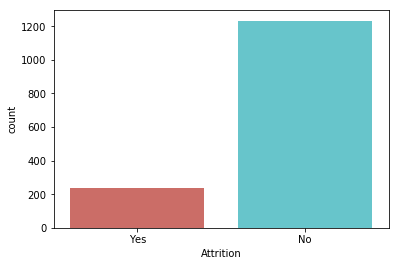

In [442]:
#See the countplot for number of employees who left the job or not.
sns.countplot(x='Attrition', data=df, palette='hls')
plt.show()


In [443]:
# Count the number of attrition or number of no attrition
print("Total records: ", len(df))
print("Records for employees left,'Yes',: ", sum(df.Attrition == 'Yes'))
print("Records for employees stayed,'No',: ", sum(df.Attrition == 'No'))

('Total records: ', 1470)
("Records for employees left,'Yes',: ", 237)
("Records for employees stayed,'No',: ", 1233)


In [444]:
#Convert categorical variables to dummy variables (0 or 1)
cat_df= pd.get_dummies(obj_df, columns=["Attrition", "BusinessTravel", "Department", 
"EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime", "Education", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance", "JobLevel", "StockOptionLevel", "TrainingTimesLastYear","NumCompaniesWorked", "YearsSinceLastPromotion"], 
prefix=["attrition", "BussTravel", "Dept", "Edu", "", "", "", "overtime", "degree", "EnvSat", "jobInv", "jobsat", "perfm", "relshipsat", "worklifebal", "", "", "", "", ""])

In [445]:
#See the columns of renovated categorical variables.
cat_df. head(2)

,attrition_No,attrition_Yes,BussTravel_Non-Travel,BussTravel_Travel_Frequently,BussTravel_Travel_Rarely,Dept_Human Resources,Dept_Research & Development,Dept_Sales,Edu_Human Resources,Edu_Life Sciences,...,_4TimeT,_5TimeT,_6TimeT,_0-3NCWorked,_4-6NCWorked,_7-9NCWorked,_YSLP_1,_YSLP_2,_YSLP_3,_YSLP_4
0,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [446]:
#Build a new dataframe containing only the numerical columns.
num_df = df.select_dtypes(include=['int64']).copy()
num_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1102,1,94,5993,19479,11,8,6,4,5
1,49,279,8,61,5130,24907,23,10,10,7,7
2,37,1373,2,92,2090,2396,15,7,0,0,0
3,33,1392,3,56,2909,23159,11,8,8,7,0
4,27,591,2,40,3468,16632,12,6,2,2,2


In [447]:
#Merge cat_df and num_df data sets as df
df  = pd.concat([cat_df, num_df], axis=1)
df.head()

,attrition_No,attrition_Yes,BussTravel_Non-Travel,BussTravel_Travel_Frequently,BussTravel_Travel_Rarely,Dept_Human Resources,Dept_Research & Development,Dept_Sales,Edu_Human Resources,Edu_Life Sciences,...,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,1,0,0,1,0,0,1,0,1,...,1102,1,94,5993,19479,11,8,6,4,5
1,1,0,0,1,0,0,1,0,0,1,...,279,8,61,5130,24907,23,10,10,7,7
2,0,1,0,0,1,0,1,0,0,0,...,1373,2,92,2090,2396,15,7,0,0,0
3,1,0,0,1,0,0,1,0,0,1,...,1392,3,56,2909,23159,11,8,8,7,0
4,1,0,0,0,1,0,1,0,0,0,...,591,2,40,3468,16632,12,6,2,2,2


In [448]:
#Data Columns
cat_df.columns.values

array(['attrition_No', 'attrition_Yes', 'BussTravel_Non-Travel',
       'BussTravel_Travel_Frequently', 'BussTravel_Travel_Rarely',
       'Dept_Human Resources', 'Dept_Research & Development', 'Dept_Sales',
       'Edu_Human Resources', 'Edu_Life Sciences', 'Edu_Marketing',
       'Edu_Medical', 'Edu_Other', 'Edu_Technical Degree', '_Female',
       '_Male', '_Healthcare Representative', '_Human Resources',
       '_Laboratory Technician', '_Manager', '_Manufacturing Director',
       '_Research Director', '_Research Scientist', '_Sales Executive',
       '_Sales Representative', '_Divorced', '_Married', '_Single',
       'overtime_No', 'overtime_Yes', 'degree_Below College',
       'degree_College', 'degree_Bachelor', 'degree_Master',
       'degree_Doctor', 'EnvSat_Low', 'EnvSat_Medium', 'EnvSat_High',
       'EnvSat_VeryHigh', 'jobInv_Low', 'jobInv_Medium', 'jobInv_High',
       'jobInv_VeryHigh', 'jobsat_Low', 'jobsat_medium', 'jobsat_High',
       'jobsat_VeryHigh', 'perfm_Low', 

In [466]:
data_final_vars=df.columns.values.tolist()
y=['attrition_Yes']
X=[i for i in data_final_vars if i not in y]


#Applying Recursive feature elimination, REF, is based on the idea to repeatedly construct a model (for example an SVM or a regression model) and choose either the best or worst performing feature (for example based on coefficients), setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. 

In [467]:
 from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
names = df.columns.values
logreg = LogisticRegression()
rfe = RFE(logreg, 30)
rfe = rfe.fit(df[X], df[y] )
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))

Features sorted by their rank:
[(1.0, 'BussTravel_Non-Travel'), (1.0, 'BussTravel_Travel_Frequently'), (1.0, 'Dept_Research & Development'), (1.0, 'Edu_Other'), (1.0, 'Edu_Technical Degree'), (1.0, 'EnvSat_VeryHigh'), (1.0, '_0-3NCWorked'), (1.0, '_4-6NCWorked'), (1.0, '_Divorced'), (1.0, '_Female'), (1.0, '_Healthcare Representative'), (1.0, '_Human Resources'), (1.0, '_JobLevel2'), (1.0, '_JobLevel3'), (1.0, '_JobLevel5'), (1.0, '_Manufacturing Director'), (1.0, '_Married'), (1.0, '_Research Scientist'), (1.0, '_Sales Executive'), (1.0, '_StockLevel2'), (1.0, '_StockLevel3'), (1.0, 'attrition_No'), (1.0, 'degree_Doctor'), (1.0, 'jobInv_High'), (1.0, 'jobInv_VeryHigh'), (1.0, 'jobsat_VeryHigh'), (1.0, 'overtime_No'), (1.0, 'perfm_Excellent'), (1.0, 'relshipsat_Excellent'), (1.0, 'worklifebal_Best'), (2.0, 'jobsat_Low'), (3.0, 'jobsat_medium'), (4.0, '_YSLP_3'), (5.0, '_3TimeT'), (6.0, 'worklifebal_Bad'), (7.0, 'worklifebal_Better'), (8.0, 'Edu_Life Sciences'), (9.0, '_1TimeT'), (10.0,

In [470]:
cols=['BussTravel_Non-Travel', 'BussTravel_Travel_Frequently', 'Dept_Research & Development', 'Edu_Other', 'Edu_Technical Degree', 'EnvSat_VeryHigh', '_0-3NCWorked', '_4-6NCWorked', '_Divorced', '_Female', '_Healthcare Representative', '_Human Resources', '_JobLevel2', '_JobLevel3', '_JobLevel5', '_Manufacturing Director', '_Married', '_Research Scientist', '_Sales Executive', '_StockLevel2', '_StockLevel3', 'degree_Doctor', 'jobInv_High', 'jobInv_VeryHigh', 'jobsat_VeryHigh', 'overtime_No', 'perfm_Excellent', 'relshipsat_Excellent', 'worklifebal_Best'] 
X=df[cols]
y=df['attrition_Yes']

In [471]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          attrition_Yes   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1441
Method:                           MLE   Df Model:                           28
Date:                Wed, 28 Mar 2018   Pseudo R-squ.:                    -inf
Time:                        03:06:22   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                   -5.1895e+05
                                        LLR p-value:                     1.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
BussTravel_Non-Travel           -0.6325      0.338     -1.872      0.061     

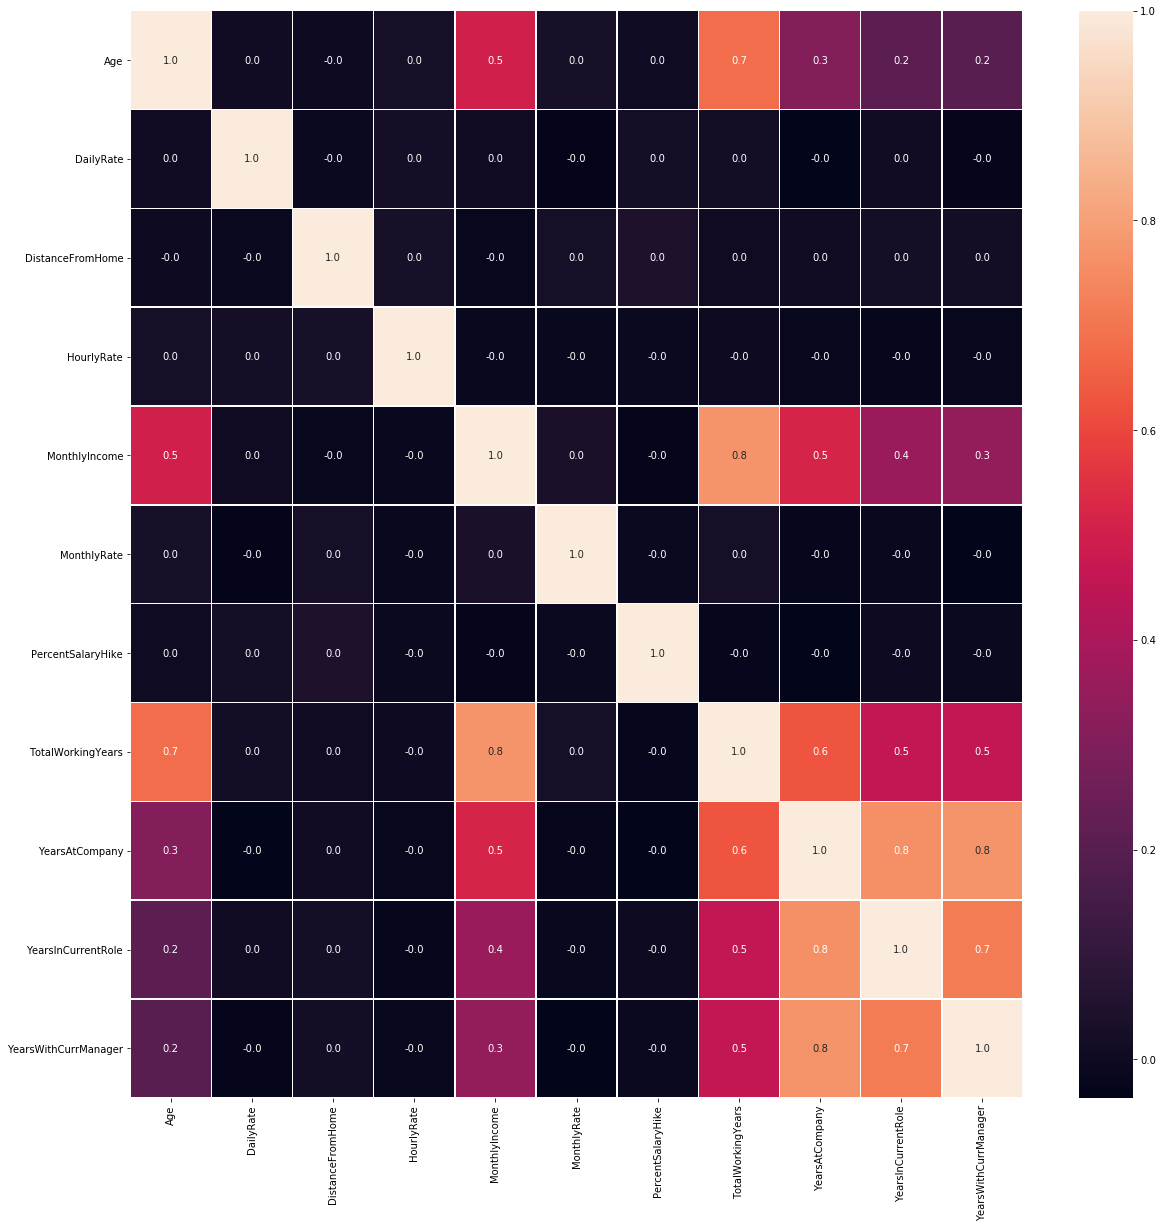

In [472]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(num_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [482]:
#Apply different classification methods to find the best classification score
def get_results(model, X, y):

    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        from sklearn.model_selection import cross_val_score
        compute = cross_val_score(model, X, y, cv=10)
        mean = compute.mean()
        std = compute.std()
        return mean, std

def display_classifier_results(X,y):

    models = []

    from sklearn.neighbors import KNeighborsClassifier
    models = [KNeighborsClassifier()]
    
    from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
    models += [GaussianNB(), MultinomialNB(), BernoulliNB()]

    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier#, VotingClassifier
    models += [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier()]

    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
    models += [LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]

    from sklearn.svm import SVC, LinearSVC
    models += [SVC(),LinearSVC()]

    from sklearn.linear_model import SGDClassifier
    models += [SGDClassifier()]

    from sklearn.neighbors.nearest_centroid import NearestCentroid
    models += [NearestCentroid()]

    from sklearn.neural_network import MLPClassifier
    models += [MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30, 2), random_state=1)]

    output = {}

    for m in models:
        try:
            model_name = type(m).__name__
            scores = get_results(m,X,y)
            row = {"Average Score" : scores[0], "Standard Deviation" : scores[1]}
            output[model_name] = row
        except:
            pass

    from pandas import DataFrame
    from IPython.display import display

    display(DataFrame(data=output).T.round(2).sort_values("Average Score", ascending=False))

display_classifier_results(X,y)

/Users/emrahceyhan/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


,Average Score,Standard Deviation
AdaBoostClassifier,1.00,0.00
GradientBoostingClassifier,1.00,0.00
QuadraticDiscriminantAnalysis,1.00,0.00
BernoulliNB,0.99,0.01
ExtraTreesClassifier,0.99,0.01
GaussianNB,0.99,0.01
RandomForestClassifier,0.98,0.01
LinearDiscriminantAnalysis,0.88,0.03
MLPClassifier,0.84,0.00
SVC,0.84,0.00


In [473]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [474]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [475]:
#Apply the model, KNN
y = df['attrition_Yes']
X = df.drop('attrition_Yes', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.7, random_state=17)

In [476]:
#Fit the model 
Knn = KNeighborsClassifier(n_neighbors=10)
Knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [477]:
Knn_prediction = Knn.predict(X_test)
accuracy_score(Knn_prediction, y_test)

0.83576287657920312

In [478]:
#Choose the best parameters with GridSearchCV
Knn_pipe = Pipeline([('scaler', StandardScaler()), ('Knn', KNeighborsClassifier(n_jobs=-1))])


In [479]:
# Construct a plot showing SS for each K and pick K using this plot. For simplicity, test 2≤K≤10.
x_cols = df[df.columns[:]]
cluster_range = range( 2, 21 )
cluster_errors = []
state=5
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( x_cols )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,cluster_errors,num_clusters
0,5.086588e+10,2
1,3.386945e+10,3
2,2.520697e+10,4
3,1.848790e+10,5
4,1.563334e+10,6
5,1.358902e+10,7
6,1.166939e+10,8
7,1.027215e+10,9
8,9.224200e+09,10
9,8.281197e+09,11


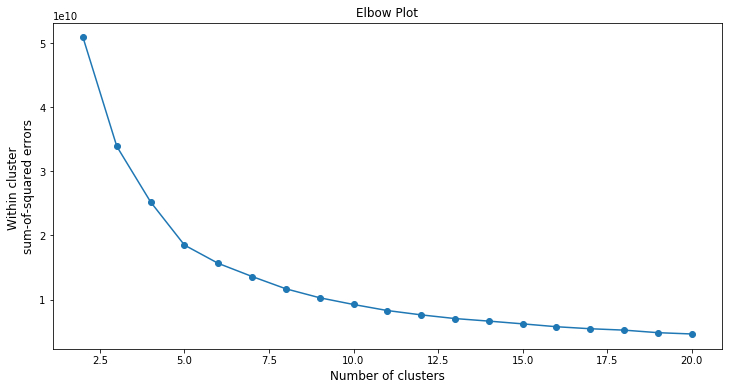

In [480]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of clusters', size=12)
plt.ylabel('Within cluster \nsum-of-squared errors', size=12)
plt.title('Elbow Plot');

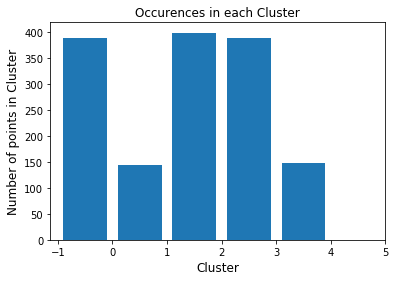

In [481]:
cluster = KMeans(n_clusters=5, random_state=10)
df['cluster'] = cluster.fit_predict(x_cols)
plt.bar(left=df['cluster'].unique()-0.5, height=df['cluster'].value_counts())
plt.xticks([-1,0,1,2,3,4,5])
plt.xlabel('Cluster', size=12)
plt.ylabel('Number of points in Cluster', size=12)
plt.title('Occurences in each Cluster');